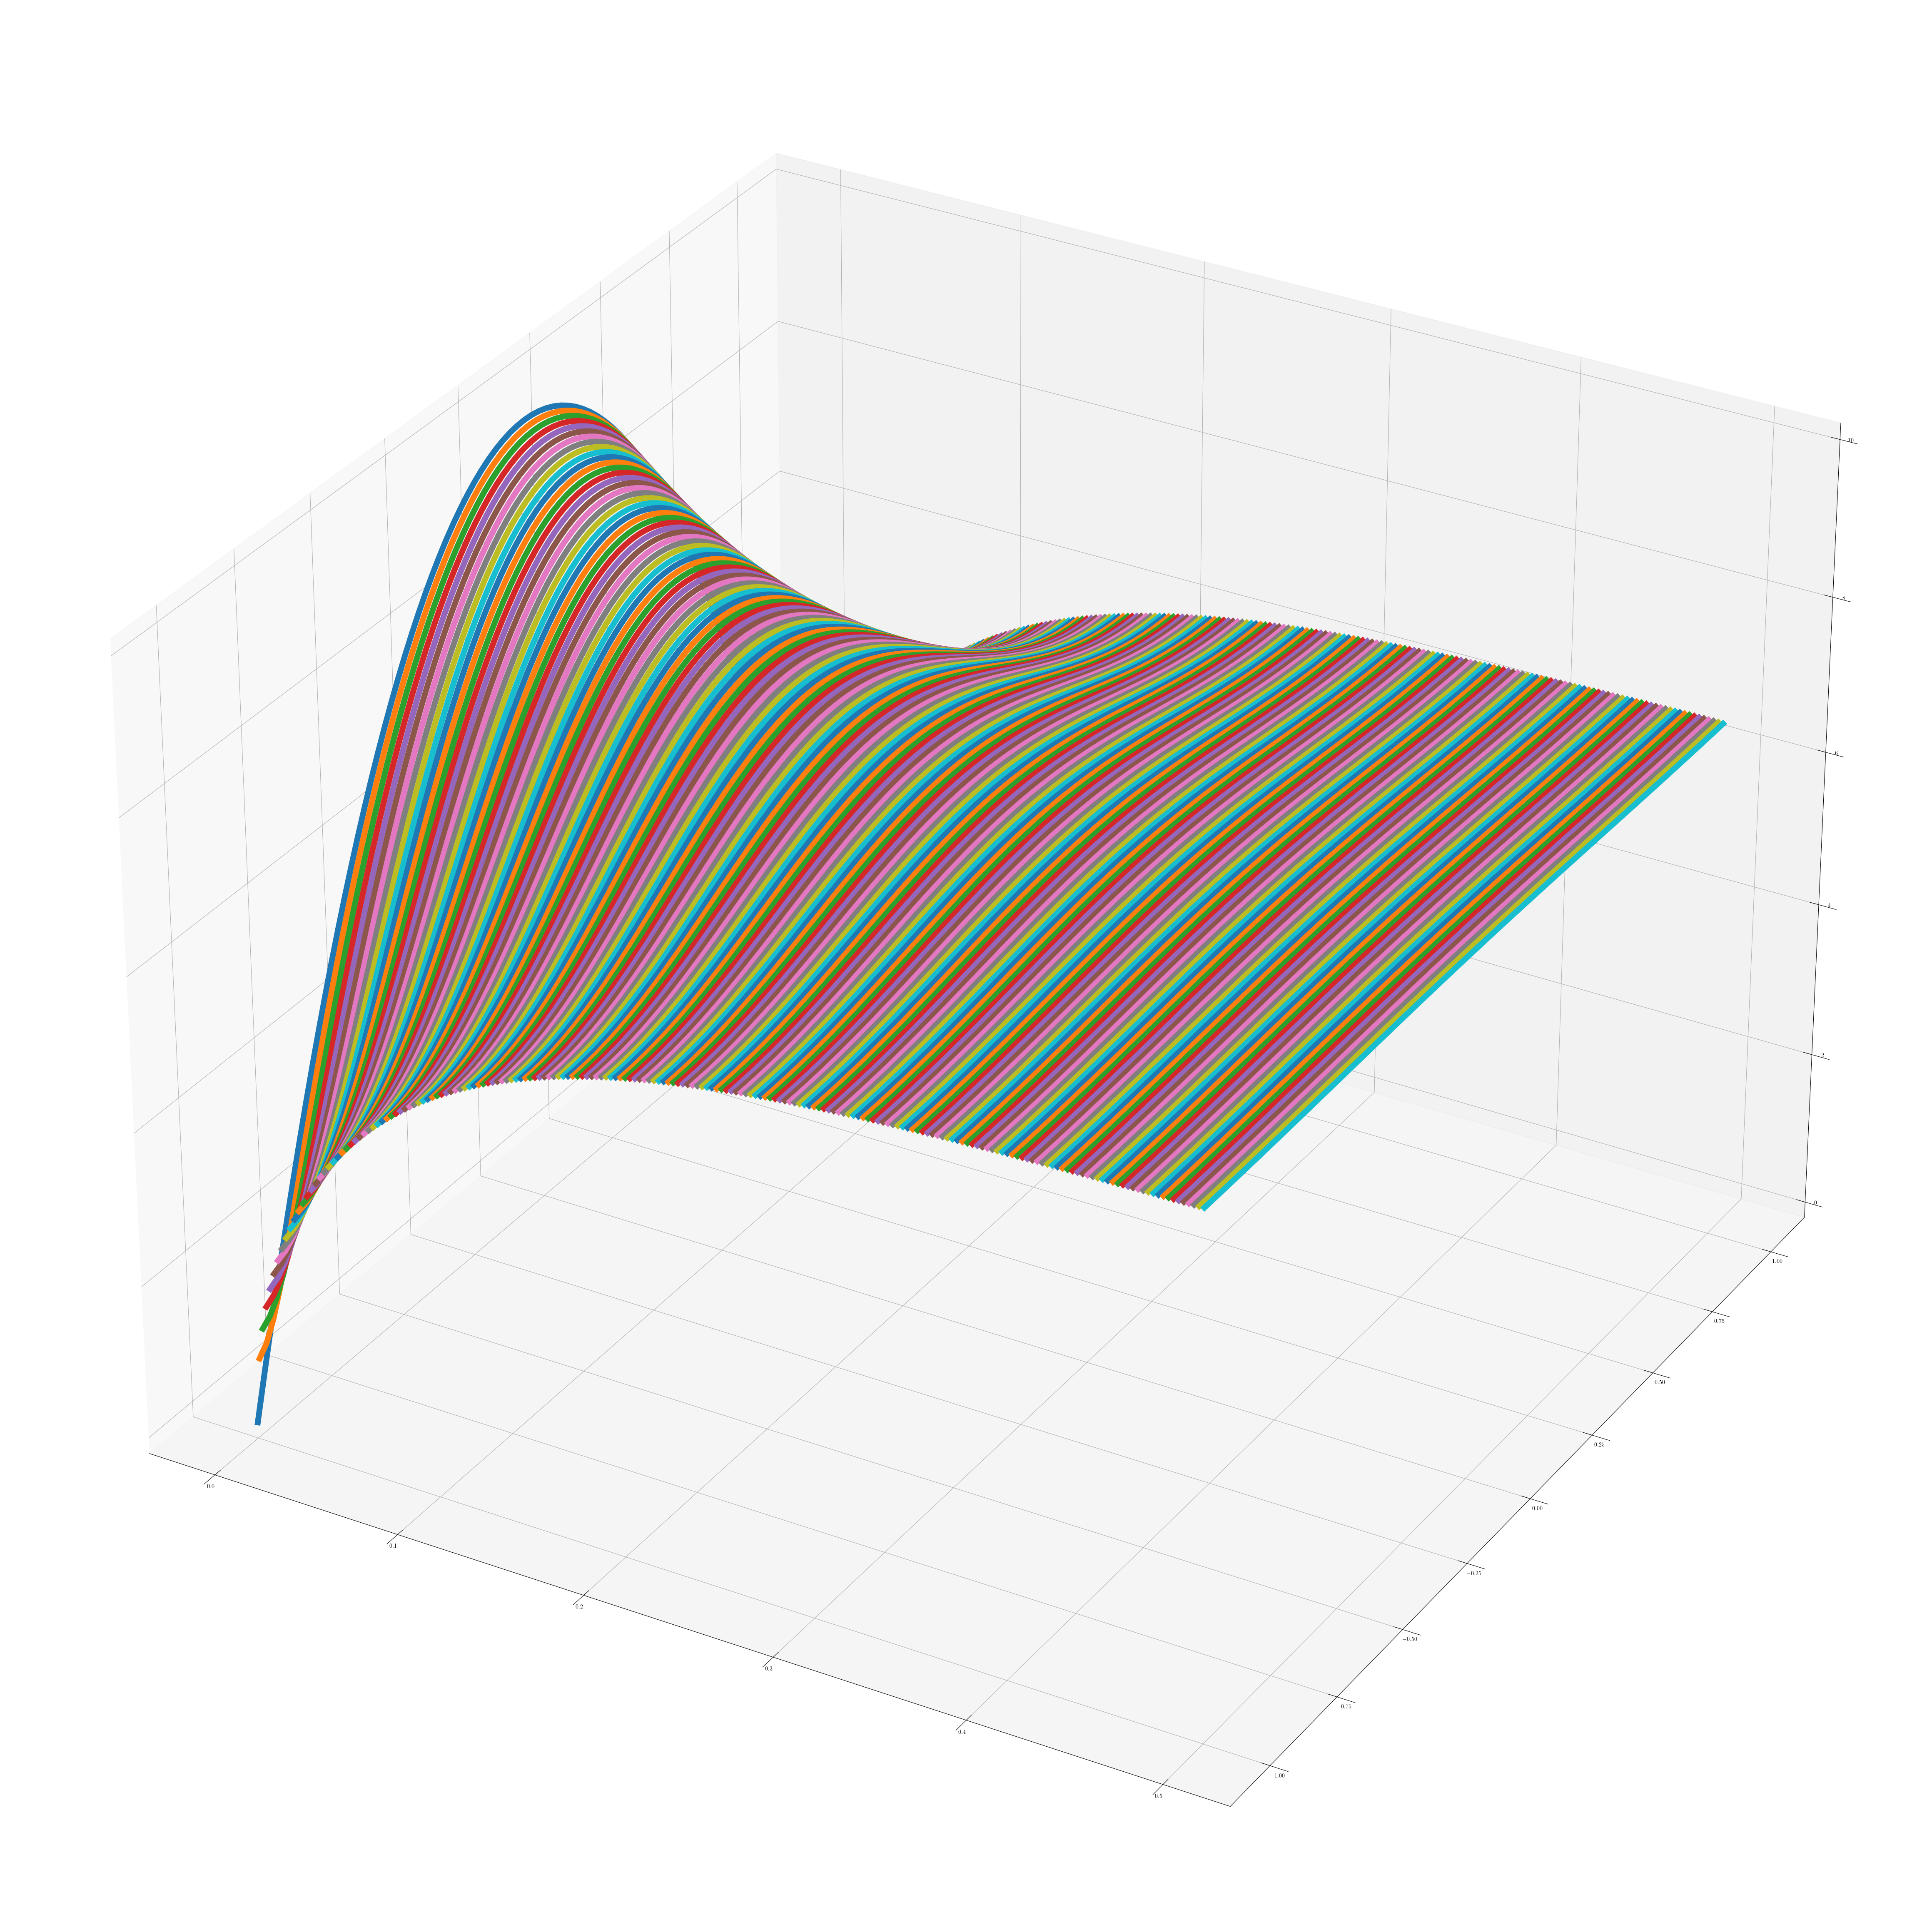

In [3]:
import matplotlib.pyplot as plt

# Based on NSPDEs 5.5 Finite Difference Approximation of the Heat Equation
# Parameters
# \{(x,t) \in (a,b) \times [0,T]\}
# J Final spacial point index
# T Final time (in second)
# M Final time step
# deltaT Time mesh size
# deltaX Space mesh size
# Dirichlet Boundary Conditions u_a = u(a), u_b = u(b)

# This returns an array of u values at each time step and spacial position
def heatEvolveExplicitEulerDirichlet(a=-1,b=1,J=20,T=10000,M=10000000,u_a=0,u_b=0,u_initial = lambda x: 10):
    deltaT = T/M        # Time mesh size
    deltaX = (b-a) / J  # Space mesh size
    cfl = deltaT / (deltaX ** 2)            # Want this below 1/2
    if(cfl > 0.5):
        print(f"Warning: the CFL number is {cfl}, so stability is not guaranteed")
    
    # Explicit Scheme
    u = [[u_a] + [u_initial(a + j * deltaX) for j in range(1,J)] + [u_b]]
    for m in range(M):
        ump1 = [[u_a] + [0 for _ in range(1, J)] + [u_b]]
        # Explicit Scheme
        for j in range(1,J):
            ump1[0][j] = u[m][j] + cfl * (u[m][j+1] - 2 * u[m][j] + u[m][j-1])
        u += ump1
    return u

# This returns an array of u values at each time step and spacial position (Periodic Condition)
def heatEvolveExplicitEulerPeriodic(a=-1,b=1,J=20,T=10000,M=10000000,u_initial = lambda x: 10):
    deltaT = T/M        # Time mesh size
    deltaX = (b-a) / J  # Space mesh size
    cfl = deltaT / (deltaX ** 2)            # Want this below 1/2
    if(cfl > 0.5):
        print(f"Warning: the CFL number is {cfl}, so stability is not guaranteed")
    
    # Explicit Scheme
    u = [[u_initial(a + j * deltaX) for j in range(0,J + 1)]]
    for m in range(M):
        ump1 = [[0 for _ in range(0, J + 1)]]
        # Explicit Scheme
        for j in range(1,J):
            ump1[0][j] = u[m][j] + cfl * (u[m][j+1] - 2 * u[m][j] + u[m][j-1])
        ump1[0][0] = u[m][0] + cfl * (u[m][1] - 2 * u[m][0] + u[m][J])
        ump1[0][J] = u[m][J] + cfl * (u[m][0] - 2 * u[m][J] + u[m][J-1])
        u += ump1
    return u

# This returns an array of u values at each time step and spacial position (Neumann Condition)
def heatEvolveExplicitEulerNatural(a=-1,b=1,J=20,T=10000,M=10000000,u_initial = lambda x: 10):
    deltaT = T/M        # Time mesh size
    deltaX = (b-a) / J  # Space mesh size
    cfl = deltaT / (deltaX ** 2)            # Want this below 1/2
    if(cfl > 0.5):
        print(f"Warning: the CFL number is {cfl}, so stability is not guaranteed")
    
    # Explicit Scheme
    u = [[u_initial(a + j * deltaX) for j in range(0,J + 1)]]
    for m in range(M):
        ump1 = [[0 for _ in range(0, J + 1)]]
        # Explicit Scheme
        for j in range(1,J):
            ump1[0][j] = u[m][j] + cfl * (u[m][j+1] - 2 * u[m][j] + u[m][j-1])
        ump1[0][0] = u[m][0] + cfl * (u[m][1] - u[m][0])
        ump1[0][J] = u[m][J] + cfl * (-u[m][J] + u[m][J-1])
        u += ump1
    return u

if __name__ == "__main__":
    a = -1
    b = 1
    J = 80                 # Final spacial point index
    T = 0.5                # Final time (in second)
    M = 2000             # Final time step
    deltaT = T/M        # Time mesh size
    deltaX = (b-a) / J  # Space mesh size
    u_initial = lambda x : -(x-1)*(x+1)*10
    #u = heatEvolveExplicitEulerDirichlet(a, b, J, T, M, u_a = 0, u_b = 0, u_initial = u_initial)
    u = heatEvolveExplicitEulerNatural(a, b, J, T, M, u_initial=u_initial)
    deltaX = (b-a) / J  # Space mesh size

    fig = plt.figure(figsize=(80,60),dpi=100)
    ax = fig.add_subplot(projection="3d")
    
    plt.rcParams['text.usetex'] = True

    # Two plots
    #fig, axs = plt.subplots(2)
    #axs = plt.subplots(1)

    for m in range(0, M, 10):
        ax.plot([m/M*T for j in range(J+1)],[a + j * deltaX for j in range(J+1)], u[m], linewidth=10)
    #axs[1].plot(range(M), [discretelPNorm(u[m], deltaX, p=1) for m in range(M)])
    #fig.title(r"$u_{tt} = \Delta u$ in $(x,t) \in \left[" + f"({a},{b}), (0,{T})" + r"\right]$")
    #fig.suptitle(f"{J + 1} spacial mesh points, {M+1} time mesh points, {J * (M+1)} points overall")
    #plt.suptitle(r"$u_{tt} = \Delta u$ in $(x,t) \in \left[" + f"({a},{b}), (0,{T})" + r"\right]$" + "\n" + f"{J + 1} spacial mesh points, {M+1} time mesh points, {J * (M+1)} points overall")
    plt.show()
    fig.savefig("gf_new.png", transparent=False)
    #print(u)

